In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
import glob
import numpy as np

In [4]:
def get_data(index="sh510050"):
    sh50_files = sorted(glob.glob("../sh_index_data_tdq/{}_*.tsv".format(index)))

    sh50_pd = pd.read_table(sh50_files[0], header=0, index_col=0,parse_dates=["day"])
    for f in sh50_files[1:]:
        add_pd = pd.read_table(f, header=0, index_col=0,parse_dates=["day"])
        add_pd = add_pd[add_pd["day"] > list(sh50_pd["day"])[-1]] 
        sh50_pd = sh50_pd.append(add_pd)
        
    if index == "sh512100":
        sh50_pd.loc[sh50_pd["datetime"].map(str) <"2022-09-05", "close"] *= 2.6895

    sh50_pd.reset_index(drop=True, inplace=True)
    sh50_pd["close_yes"] = sh50_pd["close"].shift()
    sh50_pd = sh50_pd[sh50_pd["datetime"].map(str) > "2021-03-18"]
    return sh50_pd

In [12]:
def normal_vol(vol):
    a= np.array(vol)
    dates = int(len(a)/48)
    a = a.reshape(dates, 48)
    a.mean()
    avg = np.average(a, axis=0)

    meana = np.tile(avg, dates)
    return vol/meana

In [5]:
sh50_pd = get_data(index="sh510050")
sh50_pd

,open,close,high,low,vol,amount,year,month,day,hour,minute,datetime,close_yes
240,3.580,3.589,3.598,3.580,27276800.0,97960312.0,2021,3,18,9,35,2021-03-18 09:35,3.576
241,3.588,3.593,3.599,3.588,19561000.0,70313608.0,2021,3,18,9,40,2021-03-18 09:40,3.589
242,3.593,3.587,3.595,3.583,9604000.0,34471792.0,2021,3,18,9,45,2021-03-18 09:45,3.593
243,3.586,3.596,3.597,3.585,11333100.0,40702032.0,2021,3,18,9,50,2021-03-18 09:50,3.587
244,3.596,3.595,3.597,3.592,8044000.0,28912864.0,2021,3,18,9,55,2021-03-18 09:55,3.596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23563,2.630,2.632,2.632,2.626,16558900.0,43544520.0,2023,3,17,14,40,2023-03-17 14:40,2.630
23564,2.632,2.632,2.634,2.631,12506800.0,32918140.0,2023,3,17,14,45,2023-03-17 14:45,2.632
23565,2.633,2.635,2.636,2.632,10827300.0,28514916.0,2023,3,17,14,50,2023-03-17 14:50,2.632
23566,2.635,2.638,2.638,2.634,17295600.0,45572832.0,2023,3,17,14,55,2023-03-17 14:55,2.635


In [6]:
23328/48

486.0

In [13]:
sh50_pd["normal_vol"] = normal_vol(sh50_pd["vol"])

In [32]:
sh50_pd['close_ma5'] = sh50_pd['close'].rolling(window=5).mean()
sh50_pd['normal_vol_ma5'] = sh50_pd['normal_vol'].rolling(window=12).mean()
sh50_pd['normal_vol_ma20'] = sh50_pd['normal_vol'].rolling(window=60).mean()
sh50_pd['pct_change'] = sh50_pd['close'].pct_change()

In [19]:
sh50_pd

,open,close,high,low,vol,amount,year,month,day,hour,minute,datetime,close_yes,normal_vol,close_ma5,normal_vol_ma5,pct_change
240,3.580,3.589,3.598,3.580,27276800.0,97960312.0,2021,3,18,9,35,2021-03-18 09:35,3.576,0.594477,NaN,NaN,NaN
241,3.588,3.593,3.599,3.588,19561000.0,70313608.0,2021,3,18,9,40,2021-03-18 09:40,3.589,0.703694,NaN,NaN,0.001115
242,3.593,3.587,3.595,3.583,9604000.0,34471792.0,2021,3,18,9,45,2021-03-18 09:45,3.593,0.387331,NaN,NaN,-0.001670
243,3.586,3.596,3.597,3.585,11333100.0,40702032.0,2021,3,18,9,50,2021-03-18 09:50,3.587,0.524251,NaN,NaN,0.002509
244,3.596,3.595,3.597,3.592,8044000.0,28912864.0,2021,3,18,9,55,2021-03-18 09:55,3.596,0.435300,3.5920,0.529011,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23563,2.630,2.632,2.632,2.626,16558900.0,43544520.0,2023,3,17,14,40,2023-03-17 14:40,2.630,1.277611,2.6314,5.386511,0.000760
23564,2.632,2.632,2.634,2.631,12506800.0,32918140.0,2023,3,17,14,45,2023-03-17 14:45,2.632,0.837398,2.6308,3.092031,0.000000
23565,2.633,2.635,2.636,2.632,10827300.0,28514916.0,2023,3,17,14,50,2023-03-17 14:50,2.632,0.642462,2.6316,1.800843,0.001140
23566,2.635,2.638,2.638,2.634,17295600.0,45572832.0,2023,3,17,14,55,2023-03-17 14:55,2.635,0.874290,2.6334,1.490098,0.001139


# show

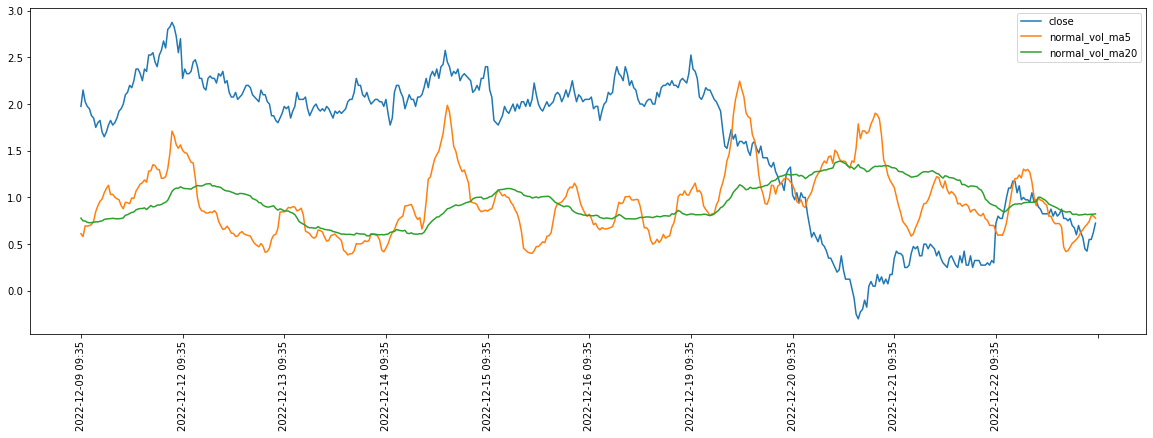

In [49]:
plt.rcParams["figure.figsize"] = (20,6)
n = 65
m = 55
df22 = sh50_pd[-48*n:-48*m]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(df22["datetime"], (df22["close"] - 2.6) *25 , label=1) 
ax.plot(df22["datetime"], df22["normal_vol_ma5"], label=2)
ax.plot(df22["datetime"], df22["normal_vol_ma20"], label=2)
# ax.axhline(0, color="black")
# ax.axhline(1, color="black")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
ax.legend(["close", "normal_vol_ma5", "normal_vol_ma20"])
plt.xticks(rotation=90)
plt.show()